In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px # plotting geo data
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [3]:
data = pd.read_csv("train.csv", header=0)

In [113]:
train, test = train_test_split(data.sort_values('added_time'),test_size=0.2, shuffle=False)

In [114]:
train.shape

(21656, 19)

In [115]:
train.dtypes

id                  object
is_appartment         bool
area               float64
added_time           int64
bedrooms           float64
new_building         int64
postcode             int64
lat                float64
lon                float64
advertiser          object
foto_amount        float64
is_promoted          int64
subtype             object
sticker             object
price_drop_date     object
energy_value       float64
energy_label        object
province            object
price              float64
dtype: object

In [ ]:
train['energy_label'] = train['energy_label'].astype('category')
train['new_building'] = train['new_building'].astype('bool')
train['postcode'] = train['postcode'].astype('category')
train.dtypes

id                   object
is_appartment          bool
area                float64
added_time            int64
bedrooms            float64
new_building           bool
postcode           category
lat                 float64
lon                 float64
advertiser           object
foto_amount         float64
is_promoted           int64
subtype            category
sticker              object
price_drop_date      object
energy_value        float64
energy_label       category
province           category
price               float64
dtype: object

In [ ]:
train.groupby('bedrooms')['area'].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,485.0,153.956763,170.902253,6.00,40.000,96.0,200.0000,1042.00
1.0,1808.0,71.758662,42.653429,13.00,55.000,65.0,76.0000,654.00
2.0,5753.0,109.967231,48.963866,11.97,85.600,99.0,119.7200,1439.00
3.0,7084.0,169.556853,269.261810,34.00,129.195,155.0,189.0000,22189.00
4.0,2879.0,216.722258,77.466283,30.00,167.000,200.0,245.0000,1107.00
5.0,896.0,275.182612,109.629431,49.00,200.000,250.0,322.0000,994.00
6.0,338.0,325.447899,121.543833,108.00,240.750,296.0,382.0000,1068.00
7.0,122.0,369.485164,149.644487,163.00,261.000,333.0,418.0425,980.00
8.0,46.0,416.652174,175.482727,195.00,294.500,387.0,495.2500,948.00


could be used for area imputing

probably should be dropped afterwards based on regression errors

In [ ]:
train['bedrooms_cat'] = pd.cut(train['bedrooms'], bins=[-1,0,1,2,3,4,5,6,float('inf')], labels=['0','1','2','3','4','5','6','7+'])

In [ ]:
train.groupby('bedrooms_cat')['bedrooms'].describe()

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\3969670797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('bedrooms_cat')['bedrooms'].describe()


,count,mean,std,min,25%,50%,75%,max
bedrooms_cat,,,,,,,,
0,894.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
1,2023.0,1.00000,0.000000,1.0,1.0,1.0,1.0,1.0
2,6155.0,2.00000,0.000000,2.0,2.0,2.0,2.0,2.0
3,7744.0,3.00000,0.000000,3.0,3.0,3.0,3.0,3.0
4,3165.0,4.00000,0.000000,4.0,4.0,4.0,4.0,4.0
5,1031.0,5.00000,0.000000,5.0,5.0,5.0,5.0,5.0
6,388.0,6.00000,0.000000,6.0,6.0,6.0,6.0,6.0
7+,256.0,8.53125,3.175735,7.0,7.0,7.0,9.0,34.0


# Duplicates

In [22]:
len(train['id'].unique())==train.shape[0]

True

# Missing values

## Checking

In [23]:
missing_values = round(train.isna().sum()/len(train)*100,2)

In [24]:
missing_values.index[(missing_values>30) | (missing_values==0)].tolist()

['id',
 'is_appartment',
 'added_time',
 'bedrooms',
 'new_building',
 'postcode',
 'foto_amount',
 'is_promoted',
 'sticker',
 'price_drop_date',
 'province',
 'price']

In [4]:
imp = MiceImputer(
    n=10,
    strategy={"energy_label": "bayesian least squares"},
    predictors={"energy_label": "area"},
    return_list=True
)

imp.fit_transform(train)

NameError: name 'train' is not defined

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\1530146464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


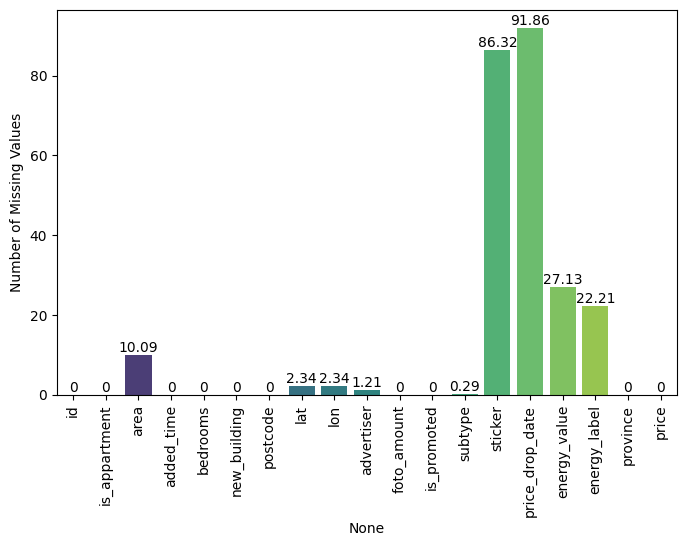

In [26]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

# Add values on top of bars directly
for i in range(0,train.shape[1]):
    ax.bar_label(ax.containers[i], label_type='edge')  # Display values on bars
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

In [338]:
train = train.drop(columns=['is_promoted','sticker','price_drop_date'])

## Analyse patterns

In [256]:
missing_checker = train.isna()*1
missing_checker = missing_checker.drop(columns=missing_values.index[(missing_values>30) | (missing_values==0)].tolist())

In [28]:
train.describe()

,area,added_time,bedrooms,new_building,lat,lon,foto_amount,is_promoted,energy_value,price
count,19471.000000,2.165600e+04,21656.000000,21656.000000,21149.000000,21149.000000,21656.000000,21656.0,15781.000000,21656.000000
mean,159.986040,1.350777e+08,2.768471,0.200683,50.952090,4.237229,17.903814,1.0,365.775894,365148.813159
std,184.546661,1.280500e+07,1.410111,0.400521,0.273340,0.847905,9.546988,0.0,4739.355784,178312.470445
min,6.000000,0.000000e+00,0.000000,0.000000,43.591236,1.676069,0.000000,1.0,-48.000000,45000.000000
25%,97.000000,1.342625e+08,2.000000,0.000000,50.829019,3.534001,11.000000,1.0,147.000000,240000.000000
50%,140.000000,1.388619e+08,3.000000,0.000000,50.981110,4.324490,17.000000,1.0,254.000000,325212.300000
75%,192.000000,1.418835e+08,3.000000,0.000000,51.145170,4.901050,24.000000,1.0,409.000000,446945.275000
max,22189.000000,1.431944e+08,48.000000,1.000000,51.498518,15.166060,131.000000,1.0,579759.000000,999999.000000


In [29]:
postcodes_summary = train.groupby('postcode')['price'].describe()['count']

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\24761442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  postcodes_summary = train.groupby('postcode')['price'].describe()['count']


In [30]:
postcodes_summary[postcodes_summary<1]

Series([], Name: count, dtype: float64)

### area + subtype

In [31]:
for a in [0,1]:
    for b in [0,1]:
        print(f'area: {a} subtype: {b} - {missing_checker[(missing_checker['area']==a) &  (missing_checker['subtype']==b)].shape[0]}')


area: 0 subtype: 0 - 19425
area: 0 subtype: 1 - 46
area: 1 subtype: 0 - 2168
area: 1 subtype: 1 - 17


areas can be imputed from subtype in most cases

some cases where subtype isnt present will be imputed based on area (most probable subtype)

if both are missing then just median

In [258]:
subtype_bedrooms = train.groupby('bedrooms_cat')['subtype'].unique().reset_index()
print(subtype_bedrooms)

  bedrooms_cat                                            subtype
0            0  ['Serviceflat', 'Studio', 'Woning', 'Apparteme...
1            1  ['Serviceflat', 'Assistentie-appartement', 'Ap...
2            2  ['Appartement', 'Serviceflat', 'Woning', 'Rijw...
3            3  ['Woning', 'Eengezinswoning', 'Appartement', '...
4            4  ['Eengezinswoning', 'Hoekwoning', 'Woning', 'V...
5            5  ['Woning', 'Rijwoning', 'Hoekwoning', 'Villa',...
6            6  ['Woning', 'Arbeiderswoning', 'Herenwoning', '...
7           7+  ['Villa', 'Woning', 'Uitzonderlijke woning', '...


C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\3802667947.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subtype_bedrooms = train.groupby('bedrooms_cat')['subtype'].unique().reset_index()


In [259]:
train.groupby('subtype')['area'].describe()

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\1669302868.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('subtype')['area'].describe()


,count,mean,std,min,25%,50%,75%,max
subtype,,,,,,,,
Andere,38.0,287.807895,225.201261,50.00,139.500,242.50,353.5000,1042.0
App. vrij beroep,5.0,128.200000,79.637931,81.00,92.000,96.00,102.0000,270.0
Appartement,6440.0,99.837915,46.211546,11.97,77.000,92.22,111.0000,1042.0
Appartementsgebouw,24.0,290.248333,146.420880,53.00,208.365,261.50,327.5000,690.0
Arbeiderswoning,14.0,215.604286,113.599784,97.79,137.750,197.50,231.1675,509.0
Assistentie-appartement,13.0,73.580769,17.863831,56.00,63.400,67.00,82.0000,124.0
Bel-étage,68.0,185.318529,55.621160,75.00,147.000,181.50,217.7500,390.0
Boerderij,5.0,334.600000,212.375375,194.00,197.000,277.00,300.0000,705.0
Buitenverblijf,6.0,256.333333,104.195329,143.00,174.750,241.50,335.2500,393.0


In [269]:
test['subtype'].astype('category').unique().isin(train['subtype'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [271]:
subtypes = train['subtype'].unique().astype('O')
print(subtypes)

['Serviceflat' 'Woning' 'Assistentie-appartement' 'Studio'
 'Eengezinswoning' 'Appartement' 'Villa' 'Hoekwoning' 'Rijwoning' 'Loft'
 'Gemengd gebruik' 'Arbeiderswoning' 'Bel-étage' 'Hoeve' 'Chalet'
 'Villa-landhuis' 'Koppelwoning' 'Penthouse' 'Uitzonderlijke woning'
 'Gelijkvloers app.' 'App. vrij beroep' 'Duplex' 'Kasteel'
 'Appartementsgebouw' 'Studio met slaaphoek' 'Dakappartement'
 'Vakantiewoning' 'Herenhuis' 'Triplex' 'Burgerswoning' 'Herenwoning'
 'Andere' 'Koppelvilla' 'Cottage' 'Moderne villa' 'Bungalow'
 'Pastorijwoning' 'Fermette' 'Boerderij' 'Woonboot' nan 'Kangoeroewoning'
 'Buitenverblijf' 'Patio woning' 'Split-level']


In [282]:
house_map = {
    'Apartments & Flats': [
        'Appartement', 'Gelijkvloers app.', 'Duplex', 'Triplex', 'Dakappartement',
        'Penthouse', 'Serviceflat', 'Assistentie-appartement', 'Studio', 'Studio met slaaphoek', 
        'App. vrij beroep', 'Appartementsgebouw'
    ],
    'Single-Family Houses': [
        'Eengezinswoning', 'Woning', 'Villa', 'Villa-landhuis', 'Moderne villa',
        'Cottage', 'Bungalow', 'Koppelwoning', 'Koppelvilla', 'Hoekwoning', 'Rijwoning', 'Bel-étage', 'Burgerswoning'
    ],
    'Historical & Luxurious Homes': [
        'Herenhuis', 'Herenwoning', 'Uitzonderlijke woning', 'Kasteel', 'Pastorijwoning'
    ],
    'Farm & Rural Houses': [
        'Hoeve', 'Boerderij', 'Fermette', 'Chalet'
    ],
    'Mixed-Use & Unique Properties': [
        'Gemengd gebruik', 'Arbeiderswoning', 'Kangoeroewoning', 'Woonboot', 'Loft',
        'Split-level', 'Patio woning', 'Buitenverblijf', 'Vakantiewoning'
    ]
}

# Function to categorize houses
def categorize_house(house_type):
    for category, types in house_map.items():
        if house_type in types:
            return category
    return 'Other'


In [283]:
train['house_type'] = train['subtype'].apply(categorize_house)

In [284]:
subtype_housetype = train.groupby('house_type')['subtype'].unique().reset_index()
print(subtype_housetype)

                      house_type  \
0             Apartments & Flats   
1            Farm & Rural Houses   
2   Historical & Luxurious Homes   
3  Mixed-Use & Unique Properties   
4                          Other   
5           Single-Family Houses   

                                             subtype  
0  ['Serviceflat', 'Assistentie-appartement', 'St...  
1  ['Hoeve', 'Chalet', 'Fermette', 'Boerderij']
C...  
2  ['Uitzonderlijke woning', 'Kasteel', 'Herenhui...  
3  ['Loft', 'Gemengd gebruik', 'Arbeiderswoning',...  
4  ['Andere']
Categories (44, object): ['Andere',...  
5  ['Woning', 'Eengezinswoning', 'Villa', 'Hoekwo...  


### energy

In [72]:
energy_label_province = train.groupby('province')['energy_label'].unique().reset_index()
print(energy_label_province)

                         province  \
0                       Antwerpen   
1                      Henegouwen   
2   Hoofdstedelijk Gewest Brussel   
3                         Limburg   
4                            Luik   
5                       Luxemburg   
6                           Namen   
7                 Oost-Vlaanderen   
8                  Vlaams-Brabant   
9                   Waals-Brabant   
10                West-Vlaanderen   

                                         energy_label  
0   ['c', NaN, 'f', 'd', 'b', 'a', 'e', 'a+']
Cate...  
1   ['d', 'f', 'b', 'c', 'g', NaN, 'a', 'e', 'a++'...  
2   ['g', 'e', 'e-', 'c', 'f', ..., 'a-', 'd+', 'b...  
3   ['f', NaN, 'c', 'b', 'd', 'a', 'e', 'a+']
Cate...  
4   ['g', 'b', NaN, 'f', 'c', 'e', 'd', 'a', 'a++'...  
5   ['b', NaN, 'd', 'c', 'e', 'a', 'a+', 'g', 'f',...  
6   ['g', NaN, 'b', 'c', 'a', 'f', 'd', 'e', 'a+']...  
7   ['b', 'e', 'a', NaN, 'c', 'd', 'f', 'a+']
Cate...  
8   ['b', 'a', 'e', 'd', 'f', 'c', NaN, 'a+']
Cate.

(0.0, 2000.0)

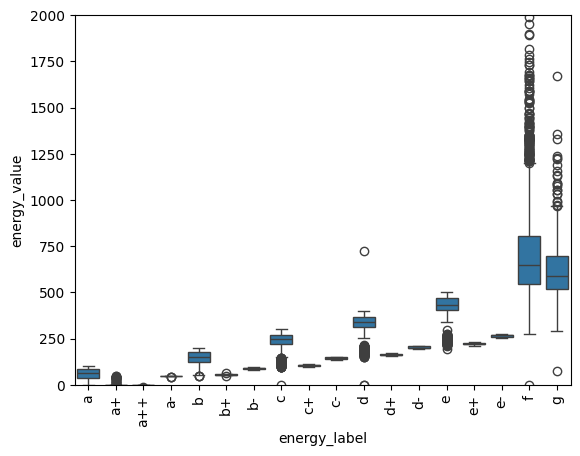

In [62]:
sns.boxplot(x=train['energy_label'], y=train['energy_value'], data=train)
plt.xticks(rotation=90)
plt.ylim(0,2000)

In [122]:
train.groupby('energy_label')['energy_value'].describe()

,count,mean,std,min,25%,50%,75%,max
energy_label,,,,,,,,
a,1818.0,60.571826,28.763451,0.0,35.00,66.0,86.00,100.0
a+,266.0,2.830827,9.689011,0.0,0.00,0.0,0.00,45.0
a++,12.0,-2.416667,5.961366,-19.0,0.00,0.0,0.00,0.0
a-,16.0,44.062500,2.015564,40.0,45.00,45.0,45.00,45.0
b,3517.0,149.562633,30.963003,45.0,125.00,151.0,175.00,200.0
b+,7.0,54.714286,4.680252,47.0,53.00,55.0,56.50,62.0
b-,11.0,87.818182,4.445631,80.0,85.50,89.0,90.00,95.0
c,3079.0,242.822670,36.583199,0.0,221.00,245.0,270.00,300.0
c+,20.0,104.700000,4.437875,98.0,100.75,105.5,107.25,112.0


In [64]:
for a in [0,1]:
    for b in [0,1]:
        print(f'value: {a} label: {b} - {missing_checker[(missing_checker['energy_value']==a) &  (missing_checker['energy_label']==b)].shape[0]}')

value: 0 label: 0 - 15725
value: 0 label: 1 - 56
value: 1 label: 0 - 1122
value: 1 label: 1 - 4753


Text(0, 0.5, 'area')

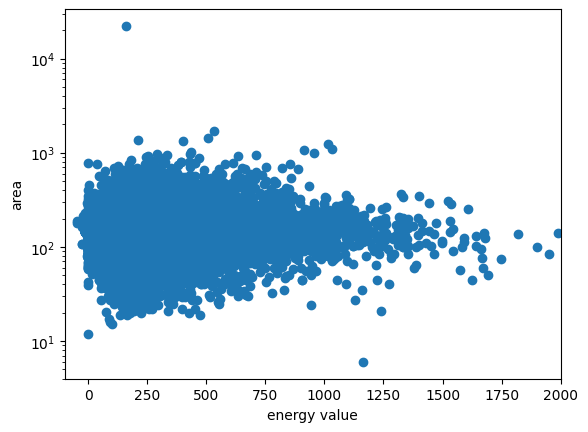

In [140]:
plt.scatter(y=train['area'],x=train['energy_value'])
plt.xlim(-100,2000)
plt.xlabel('energy value')
plt.yscale('log')
plt.ylabel('area')


possibly categorization or just use energy value

there seems to be larger variation for some areas

### Lat+ Lon

In [316]:
postcode_lat = train.groupby('postcode')['lat'].describe()
postcode_NA = postcode_lat[postcode_lat['count']<1].index.astype('int64').to_list()

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\4140177040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  postcode_lat = train.groupby('postcode')['lat'].describe()


In [304]:
postcode_list = pd.read_csv("BE.txt", sep="\t", header=None)[[1,9,10]]
postcode_list.columns = ['postcode','lat','lon']

In [319]:
mapping_lon = dict(zip(postcode_list['postcode'], postcode_list['lon']))
mapping_lat = dict(zip(postcode_list['postcode'], postcode_list['lat']))

In [320]:
train['postcode_in_list'] = train['postcode'].isin(postcode_NA)
train['lon'] = train.apply(lambda row: mapping_lon[row['postcode']] if row['postcode_in_list'] else row['lon'], axis=1)
train['lat'] = train.apply(lambda row: mapping_lat[row['postcode']] if row['postcode_in_list'] else row['lat'], axis=1)

## Outliers

In [368]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

### Lon+Lat

In [388]:
fig = px.scatter_geo(train, lat='lat', lon='lon', scope='europe')
fig.update_geos(showcountries=True, showcoastlines=True)
fig.show()

In [378]:
robust_cov = EllipticEnvelope(contamination=0.0002)
robust_cov.fit(train[['lat','lon']])
outliers = robust_cov.predict(train[['lat','lon']])

In [385]:
train['lat'] = train['lat'].where(outliers==1, np.nan)
train['lon'] = train['lon'].where(outliers==1, np.nan)

In [387]:
train['lat'] = train.groupby('postcode')['lat'].transform(lambda x: x.fillna(x.mean()))
train['lon'] = train.groupby('postcode')['lon'].transform(lambda x: x.fillna(x.mean()))

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\2596216520.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\2596216520.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Area

In [231]:
clf_area = IsolationForest(contamination=0.0001)
outliers_area = clf_area.fit_predict(train[['area']].dropna())

In [ ]:
sum((outliers_area==-1))

np.int64(2)

In [233]:
train[['area','id']].dropna()[outliers_area==-1]['id']

14706    tr14706
14743    tr14743
Name: id, dtype: object

In [237]:
train['area'] = train['area'].where(~train['id'].isin(train[['area','id']].dropna()[outliers_area==-1]['id']), np.nan)

<Axes: xlabel='area', ylabel='Density'>

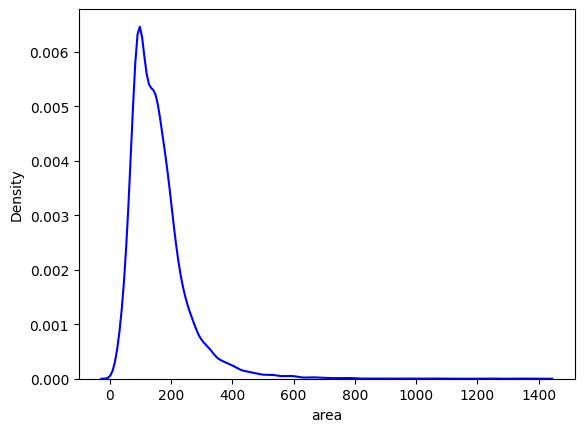

In [238]:
sns.kdeplot(train['area'], color='blue', fill=False)


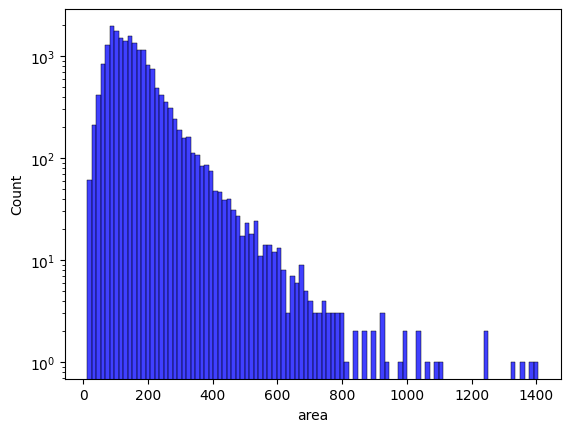

In [240]:
sns.histplot(train['area'], color='blue', fill=True, bins=100)
plt.yscale('log')
#plt.xscale('log')

In [241]:
train['area'].describe()

count    19412.000000
mean       158.726879
std         95.448033
min         11.970000
25%         96.000000
50%        140.000000
75%        192.000000
max       1405.000000
Name: area, dtype: float64

ValueError: 'c' argument has 19414 elements, which is inconsistent with 'x' and 'y' with size 19413.

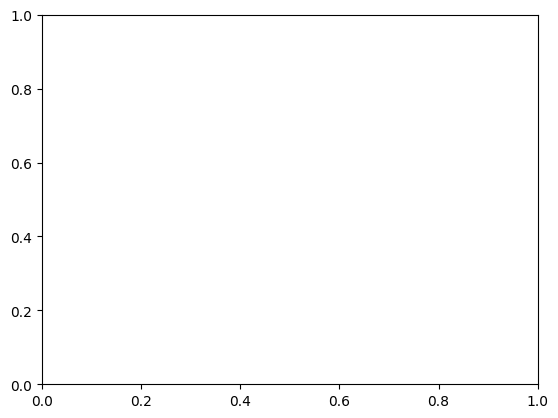

In [ ]:
plt.scatter(train[train['area']<20000]['area'],train[train['area']<20000]['price'],c=outliers_area)
plt.xlabel('area')
plt.ylabel('price')

In [255]:
train.groupby('bedrooms_cat')['area'].describe()

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\3721828110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby('bedrooms_cat')['area'].describe()


,count,mean,std,min,25%,50%,75%,max
bedrooms_cat,,,,,,,,
0,528.0,155.030076,163.859803,15.00,41.00,102.0,200.00,1042.0
1,1861.0,70.979393,42.017119,13.00,55.00,65.0,75.00,670.0
2,5692.0,109.324900,46.446141,11.97,86.00,98.0,118.00,900.0
3,6936.0,165.957086,61.300820,34.00,129.00,155.0,188.81,1250.0
4,2887.0,217.020450,77.910387,30.00,168.00,200.0,246.00,1107.0
5,920.0,278.945728,111.508216,49.00,203.00,256.0,325.00,994.0
6,360.0,321.903556,120.232864,76.00,240.75,298.0,376.00,1068.0
7+,228.0,416.002500,215.691717,32.00,277.50,358.5,501.25,1405.0


### Added date


In [121]:
train['added_time'].describe()

count    2.165600e+04
mean     1.332006e+08
std      1.364840e+07
min      0.000000e+00
25%      1.324795e+08
50%      1.375728e+08
75%      1.406011e+08
max      1.421243e+08
Name: added_time, dtype: float64

In [ ]:
pd.to_datetime(train['added_time']*10, unit='ms')

20058   1970-01-01 00:00:00.000
12531   1970-01-01 00:00:00.000
7984    1970-01-01 00:00:00.100
14027   1970-01-01 00:00:00.100
19234   1970-01-01 00:00:00.200
                  ...          
4317    1970-06-14 11:51:53.100
24125   1970-06-14 11:51:59.500
13729   1970-06-14 11:52:47.300
11046   1970-06-14 11:52:59.500
22488   1970-06-14 11:53:48.600
Name: added_time, Length: 21656, dtype: datetime64[ns]

In [164]:
train['added_date']=pd.to_datetime(train['added_time']*10, unit='s')
train['added_year'] = train['added_date'].dt.year.astype('int64')
train['added_quarter'] = train['added_date'].dt.quarter.astype('int64')

In [169]:
train.groupby('added_year')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
added_year,,,,,,,,
1970,21.0,282833.333333,158118.415541,160000.0,185000.00,190000.00,353000.00,795000.0
1971,2.0,231425.000000,10712.667735,223850.0,227637.50,231425.00,235212.50,239000.0
1972,1.0,369000.000000,NaN,369000.0,369000.00,369000.00,369000.00,369000.0
1973,1.0,230000.000000,NaN,230000.0,230000.00,230000.00,230000.00,230000.0
1976,3.0,448240.000000,97651.896039,349720.0,399860.00,450000.00,497500.00,545000.0
1977,2.0,172000.000000,32526.911935,149000.0,160500.00,172000.00,183500.00,195000.0
1978,16.0,380355.500000,142104.234809,209000.0,255000.00,371344.00,424000.00,750000.0
1979,2.0,124750.000000,35708.892450,99500.0,112125.00,124750.00,137375.00,150000.0
1980,5.0,582800.000000,80695.105180,449000.0,570000.00,610000.00,635000.00,650000.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1976'),
  Text(5, 0, '1977'),
  Text(6, 0, '1978'),
  Text(7, 0, '1979'),
  Text(8, 0, '1980'),
  Text(9, 0, '1981'),
  Text(10, 0, '1982'),
  Text(11, 0, '1983'),
  Text(12, 0, '1984'),
  Text(13, 0, '1985'),
  Text(14, 0, '1986'),
  Text(15, 0, '1987'),
  Text(16, 0, '1988'),
  Text(17, 0, '1989'),
  Text(18, 0, '1990'),
  Text(19, 0, '1991'),
  Text(20, 0, '1992'),
  Text(21, 0, '1993'),
  Text(22, 0, '1994'),
  Text(23, 0, '1995'),
  Text(24, 0, '1996'),
  Text(25, 0, '1997'),
  Text(26, 0, '1998'),
  Text(27, 0, '1999'),
  Text(28, 0, '2000'),
  Text(29, 0, '2001'),
  Text(30, 0, '2002'),
  Text(31, 0, '2003'),
  Text(32, 0, '2004

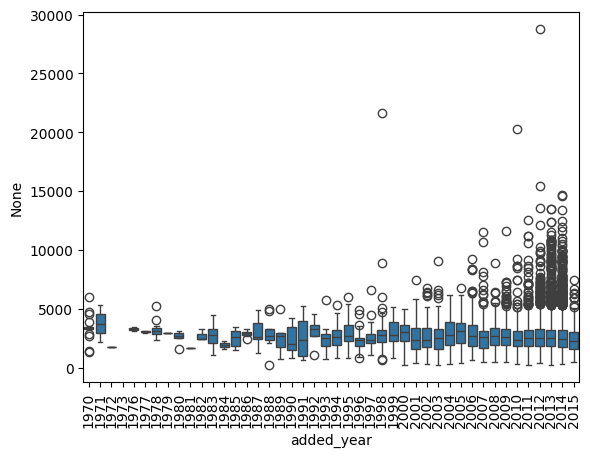

In [244]:
sns.boxplot(x=train['added_year'], y=train['price']/train['area'], data=train)
plt.xticks(rotation=90)

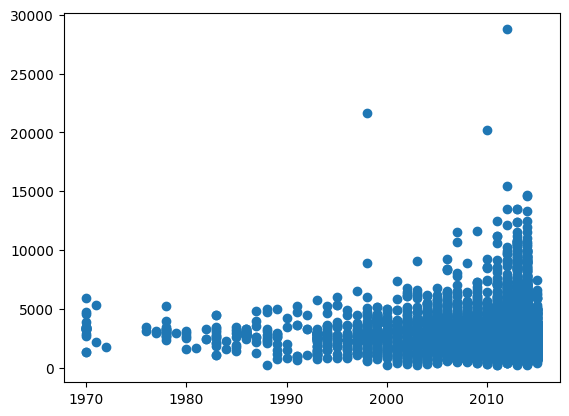

In [245]:
plt.scatter(x=train['added_year'], y=train['price']/train['area'])

In [165]:
train

,id,is_appartment,area,added_time,bedrooms,new_building,postcode,lat,lon,advertiser,...,subtype,sticker,price_drop_date,energy_value,energy_label,province,price,added_date,added_year,added_quarter
20058,tr20058,True,54.0,0,1.0,True,3530,51.055467,5.385740,LIMBURGSE WOONCENTRALE,...,Serviceflat,NaN,NaN,NaN,NaN,Limburg,180000.0,1970-01-01 00:00:00,1970,1
12531,tr12531,True,50.0,0,1.0,True,3530,51.055467,5.385740,LIMBURGSE WOONCENTRALE,...,Serviceflat,NaN,NaN,NaN,NaN,Limburg,175000.0,1970-01-01 00:00:00,1970,1
7984,tr7984,True,54.0,1,1.0,True,3530,51.055467,5.385740,LIMBURGSE WOONCENTRALE,...,Serviceflat,NaN,NaN,NaN,NaN,Limburg,185000.0,1970-01-01 00:00:10,1970,1
14027,tr14027,True,58.0,1,1.0,True,3530,51.055467,5.385740,LIMBURGSE WOONCENTRALE,...,Serviceflat,NaN,NaN,NaN,NaN,Limburg,190000.0,1970-01-01 00:00:10,1970,1
19234,tr19234,True,59.0,2,1.0,True,3530,51.055467,5.385740,LIMBURGSE WOONCENTRALE,...,Serviceflat,NaN,NaN,NaN,NaN,Limburg,190000.0,1970-01-01 00:00:20,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,tr4317,False,276.0,142123131,5.0,False,2440,51.162080,4.991210,Vast & Goed Makelaars,...,Woning,NaN,NaN,577.00,f,Antwerpen,279000.0,2015-01-14 10:28:30,2015,1
24125,tr24125,True,134.0,142123195,2.0,False,8880,50.870990,3.121870,Vastgoedkantoor DEVRIESE,...,Penthouse,NaN,NaN,97.04,a,West-Vlaanderen,495000.0,2015-01-14 10:39:10,2015,1
13729,tr13729,False,202.0,142123673,3.0,False,8800,50.932984,3.140773,Bricx Vastgoed Roeselare,...,Woning,NaN,NaN,469.00,e,West-Vlaanderen,180000.0,2015-01-14 11:58:50,2015,1
11046,tr11046,False,120.0,142123795,2.0,True,9810,50.961018,3.601861,Joke Raman,...,Woning,NaN,NaN,165.00,b,Oost-Vlaanderen,369000.0,2015-01-14 12:19:10,2015,1


<Axes: xlabel='added_time', ylabel='Count'>

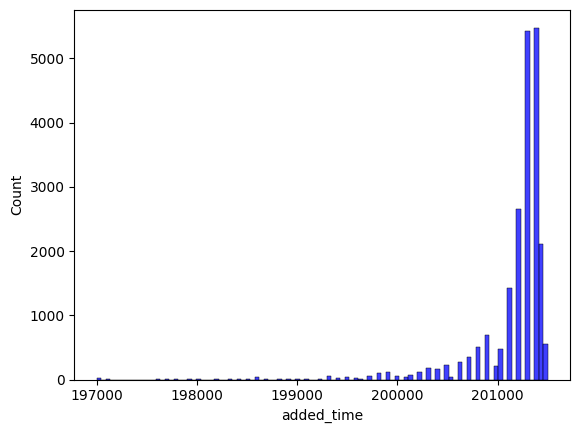

In [133]:
sns.histplot(pd.to_datetime(train['added_time']*10, unit='s').dt.strftime('%Y%m').astype('int64'), color='blue', fill=True, bins=100)
#plt.yscale('log')
#plt.xscale('log')

### Adjust prices to inflation

In [ ]:
#pd.to_datetime(train['added_time']*10, unit='s').max()

Timestamp('2015-01-14 13:41:00')

adjust everything to 100 based on the index


In [ ]:
#HPI = pd.read_csv("OECD_HPI.csv", header=0)
#HPI= HPI[HPI['Reference area']=='Belgium']
#HPI = HPI[['TIME_PERIOD','OBS_VALUE']]

In [ ]:
#HPI['period'] = pd.PeriodIndex(HPI['TIME_PERIOD'], freq='Q')
#HPI['year']=HPI['period'].dt.year
#HPI['quarter']=HPI['period'].dt.quarter

## Impute data

### Area

In [409]:
train.groupby(['bedrooms_cat','subtype'])['area'].describe()

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\3820390344.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,,count,mean,std,min,25%,50%,75%,max
bedrooms_cat,subtype,,,,,,,,
0,Andere,528.0,155.030076,163.859803,15.00,41.00,102.0,200.00,1042.0
1,Appartement,1861.0,70.979393,42.017119,13.00,55.00,65.0,75.00,670.0
2,Appartement,5692.0,109.324900,46.446141,11.97,86.00,98.0,118.00,900.0
3,Woning,6936.0,165.957086,61.300820,34.00,129.00,155.0,188.81,1250.0
4,Woning,2887.0,217.020450,77.910387,30.00,168.00,200.0,246.00,1107.0
5,Woning,920.0,278.945728,111.508216,49.00,203.00,256.0,325.00,994.0
6,Andere,360.0,321.903556,120.232864,76.00,240.75,298.0,376.00,1068.0
7+,Andere,228.0,416.002500,215.691717,32.00,277.50,358.5,501.25,1405.0


In [408]:
most_frequent_subtype = train.groupby('bedrooms_cat')['subtype'].apply(lambda x: x.value_counts().idxmax())
train['subtype']=train.groupby('bedrooms_cat')['subtype'].transform(lambda x: x.fillna(most_frequent_subtype[x.name]))

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\2332985246.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\iskan\AppData\Local\Temp\ipykernel_27772\2332985246.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Eneregy value

# Super super simple model (mean prediction)

In [177]:
train['price'].mean()

np.float64(365148.8131594015)

In [178]:
train['price'].std()

np.float64(178312.47044467807)